In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('calories_burn.csv')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [67]:
df.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [68]:
df.dropna(inplace=True)

In [69]:
df.duplicated().sum()

0

In [71]:
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])

In [72]:
df.drop(columns=["User_ID"], inplace=True)

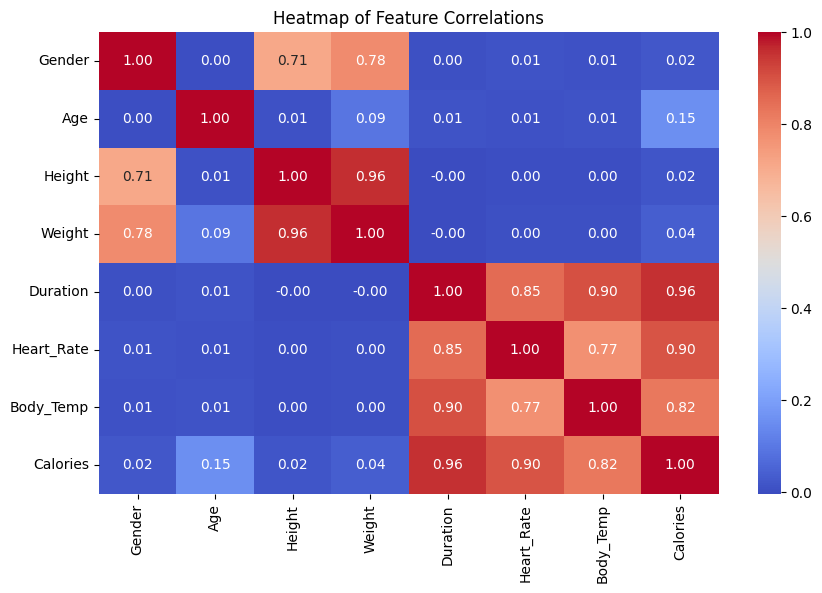

In [73]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()


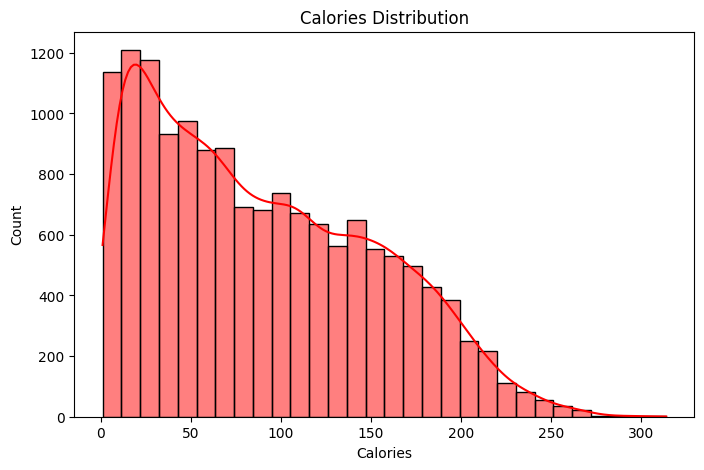

In [76]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Calories"], bins=30, kde=True, color="red")
plt.title("Calories Distribution")
plt.show()

In [77]:
def remove_outliers(column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)

In [78]:
outlier_columns = ["Height", "Weight", "Heart_Rate", "Body_Temp", "Calories"]
for col in outlier_columns:
    remove_outliers(col, factor=1.5)

In [79]:
X = df.drop(columns=["Calories"])
y = df["Calories"]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [82]:
xgb = XGBRegressor(random_state=42)

In [86]:
param_grid = {
    "max_depth": [4, 6, 8],
    "learning_rate": [0.03, 0.07, 0.1],
    "n_estimators": [50, 100, 150],
}

In [87]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.03, 0.07, 0.1],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=1)

In [88]:
best_xgb = grid_search.best_estimator_

In [89]:
y_pred = best_xgb.predict(X_test_scaled)

In [92]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f" MAE: {mae:.2f}")
print(f" MSE: {mse:.2f}")
print(f" R² Score: {r2:.2f}")

 MAE: 1.16
 MSE: 2.77
 R² Score: 1.00


In [94]:
joblib.dump(best_xgb, "calories_xgb_model.pkl")
joblib.dump(scaler, "scaler.pkl")



['scaler.pkl']

SyntaxError: invalid syntax (<ipython-input-95-de24be92712b>, line 1)